# Random Agent
This notebook has been made for testing if framework is compatible with the specific OpenAI gym environmnets.

Results at the end of notebook.

Notes:  
`Defender` cannot initialize any environmnet.

In [5]:
classic_envs = [
    "CartPole-v0",
    "CartPole-v1",
    "MountainCar-v0",
    "MountainCarContinuous-v0",
    "Pendulum-v0",
    "Acrobot-v1",
]

atari_raw = [
    "adventure",
    "air_raid",
    "alien",
    "amidar",
    "assault",
    "asterix",
    "asteroids",
    "atlantis",
    "bank_heist",
    "battle_zone",
    "beam_rider",
    "berzerk",
    "bowling",
    "boxing",
    "breakout",
    "carnival",
    "centipede",
    "chopper_command",
    "crazy_climber",
    "defender",
    "demon_attack",
    "double_dunk",
    "elevator_action",
    "enduro",
    "fishing_derby",
    "freeway",
    "frostbite",
    "gopher",
    "gravitar",
    "hero",
    "ice_hockey",
    "jamesbond",
    "journey_escape",
    "kangaroo",
    "krull",
    "kung_fu_master",
    "montezuma_revenge",
    "ms_pacman",
    "name_this_game",
    "phoenix",
    "pitfall",
    "pong",
    "pooyan",
    "private_eye",
    "qbert",
    "riverraid",
    "road_runner",
    "robotank",
    "seaquest",
    "skiing",
    "solaris",
    "space_invaders",
    "star_gunner",
    "tennis",
    "time_pilot",
    "tutankham",
    "up_n_down",
    "venture",
    "video_pinball",
    "wizard_of_wor",
    "yars_revenge",
    "zaxxon",
]
atari = []
for game in atari_raw:
    atari.append("".join([part.capitalize() for part in game.split("_")]))

atari_ram_v0 = [game + "-ram-v0" for game in atari]
atari_ram_v4 = [game + "-ram-v4" for game in atari]
atari_v0 = [game + "-v0" for game in atari]
atari_v4 = [game + "-v4" for game in atari]
black_list = ["Defender-ram-v0", "Defender-ram-v4", "Defender-v0", "Defender-v4"]  # see https://github.com/openai/gym/issues/1698

In [6]:
import sys
sys.path.append('../')

import gym
from IPython import display
import matplotlib.pyplot as plt
import numpy as np


from base import agent_base

In [7]:
env = gym.make('CartPole-v0')
agent = agent_base.RandomAgent(env, gamma=0.9)

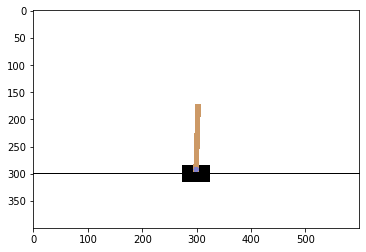

In [8]:
obs = env.reset()

img = plt.imshow(env.render(mode="rgb_array"))  # only call this once
for i in range(5):
    img.set_data(env.render(mode="rgb_array"))  # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)

    action = agent(obs)
    obs, rew, done, info = env.step(action)

    if done:
        break

In [9]:
envs = [*classic_envs, *atari_ram_v0, *atari_ram_v4, *atari_v0, *atari_v4]

working = []
not_working = []
def loop(agent, env):
    obs = env.reset()
    for i in range(5):
        action = agent(obs)
        obs, rew, done, info = env.step(action)
        if done: 
            break

for e in envs:
    if e in black_list:
        continue
    env = gym.make(e)
    agent = agent_base.RandomAgent(env, gamma=0.9)
    
    try:
        loop(agent, env)
    except Exception:
        not_working.append(e)
    else:
        working.append(e)

print(f"Working envs: {working}\n\n\n")
print(f"Not working envs: {not_working}")

Working envs: ['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v0', 'Acrobot-v1', 'Adventure-ram-v0', 'AirRaid-ram-v0', 'Alien-ram-v0', 'Amidar-ram-v0', 'Assault-ram-v0', 'Asterix-ram-v0', 'Asteroids-ram-v0', 'Atlantis-ram-v0', 'BankHeist-ram-v0', 'BattleZone-ram-v0', 'BeamRider-ram-v0', 'Berzerk-ram-v0', 'Bowling-ram-v0', 'Boxing-ram-v0', 'Breakout-ram-v0', 'Carnival-ram-v0', 'Centipede-ram-v0', 'ChopperCommand-ram-v0', 'CrazyClimber-ram-v0', 'DemonAttack-ram-v0', 'DoubleDunk-ram-v0', 'ElevatorAction-ram-v0', 'Enduro-ram-v0', 'FishingDerby-ram-v0', 'Freeway-ram-v0', 'Frostbite-ram-v0', 'Gopher-ram-v0', 'Gravitar-ram-v0', 'Hero-ram-v0', 'IceHockey-ram-v0', 'Jamesbond-ram-v0', 'JourneyEscape-ram-v0', 'Kangaroo-ram-v0', 'Krull-ram-v0', 'KungFuMaster-ram-v0', 'MontezumaRevenge-ram-v0', 'MsPacman-ram-v0', 'NameThisGame-ram-v0', 'Phoenix-ram-v0', 'Pitfall-ram-v0', 'Pong-ram-v0', 'Pooyan-ram-v0', 'PrivateEye-ram-v0', 'Qbert-ram-v0', 'Riverraid-ram-v0', '